In [1]:
pip install pandas numpy networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


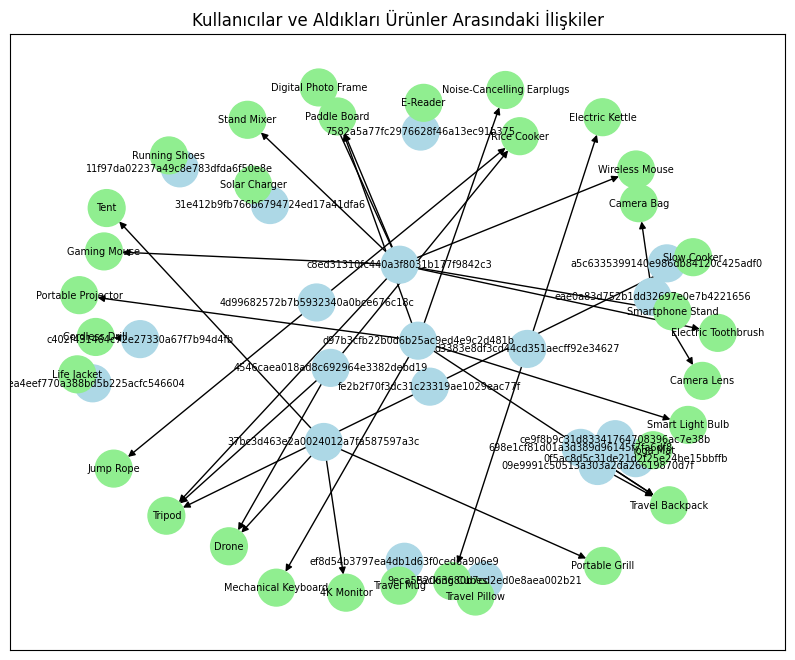

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 100 tane anlamlı ürün ismi
product_names = [
    'Mouse sem Fio', 'Fones de Ouvido Bluetooth', 'Suporte para Laptop', 'Carregador Portátil', 'Hub USB-C', 'Relógio Inteligente', 
    'Fones de Ouvido com Cancelamento de Ruído', 'Rastreador de Atividade', 'Disco Rígido Externo', 'Lâmpada de Mesa LED', 'Cadeira Ergonômica', 
    'Teclado Mecânico', 'Mouse para Jogos', 'Monitor 4K', 'Suporte para Smartphone', 'Fones de Ouvido sem Fio', 'Alto-falante Bluetooth', 
    'Hub para Casa Inteligente', 'Aspirador de Pó Robô', 'Lâmpada Inteligente', 'Projetor Portátil', 'Webcam', 'Microfone para Streaming', 
    'Mesa Digitalizadora', 'Termostato Inteligente', 'Escova de Dentes Elétrica', 'Porta-retratos Digital', 'Leitor de E-books', 'Fechadura Inteligente', 
    'Câmera de Segurança sem Fio', 'Purificador de Ar', 'Chaleira Elétrica', 'Máquina de Espresso', 'Liquidificador', 'Panela de Cozimento Lento', 
    'Panela de Arroz', 'Fritadeira sem Óleo', 'Processador de Alimentos', 'Batedeira', 'Forno Elétrico', 'Chapa Elétrica', 'Panela de Pressão Elétrica', 
    'Frigideira Elétrica', 'Furadeira sem Fio', 'Conjunto de Ferramentas', 'Serra Circular', 'Parafusadeira Elétrica', 'Cortador de Grama', 
    'Soprador de Folhas', 'Lavadora de Alta Pressão', 'Mangueira de Jardim', 'Tesouras de Jardim', 'Aspersor Inteligente', 'Bicicleta Ergométrica', 'Esteira', 
    'Tapete de Yoga', 'Conjunto de Halteres', 'Kettlebell', 'Faixas de Resistência', 'Rolo de Espuma', 'Banco de Peso', 'Corda de Pular', 
    'Barra de Tração', 'Tênis de Corrida', 'Botas de Caminhada', 'Barraca', 'Saco de Dormir', 'Fogareiro de Camping', 'Mochila', 'Lanterna', 
    'Binóculos', 'Vara de Pesca', 'Cooler', 'Caiaque Inflável', 'Prancha de Stand Up Paddle', 'Kit de Mergulho', 'Roupa de Neoprene', 'Colete Salva-vidas', 
    'Manta para Piquenique', 'Grelha Portátil', 'Fogueira Portátil', 'Alto-falante Externo', 'Rede', 'Carregador Solar', 'Garrafa de Água', 
    'Caneca de Viagem', 'Conjunto de Malas', 'Cubos Organizadores', 'Travesseiro de Viagem', 'Adaptador de Viagem', 'Hotspot WiFi Portátil', 
    'Protetores Auriculares com Cancelamento de Ruído', 'Mochila de Viagem', 'Câmera de Ação', 'Drone', 'Câmera Digital', 'Lente de Câmera', 
    'Tripé', 'Cartão de Memória', 'Bolsa para Câmera', 'Impressora de Fotos'
]

# Mevcut veri setini yükleme
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')

# Veri temizleme
df_orders.isnull().sum()
df_orders = df_orders.dropna()
df_order_items.isnull().sum()
df_products = df_products.dropna()

# Ürün ID'lerini alma
product_ids = df_products['product_id'].unique()

# Ürün ID'leri ile ürün isimlerini eşleştirme
np.random.seed(42)  # Rastgeleliğin tekrarlanabilir olması için
product_name_mapping = dict(zip(product_ids, np.random.choice(product_names, len(product_ids), replace=True)))

# Ürün isimlerini df_order_items veri setine ekleme
df_order_items['product_name'] = df_order_items['product_id'].map(product_name_mapping)

# Müşteri ve sipariş verilerini birleştirme
df_customers_orders = df_customers.merge(df_orders, on='customer_id')
orders_order_items = df_orders.merge(df_order_items, on='order_id')
top_customer_ids = orders_order_items['customer_id'].value_counts().head(20)
top_customer_data = orders_order_items[orders_order_items['customer_id'].isin(top_customer_ids.index)]

# İlk 100 satırı al
df_customers_subset = df_customers[df_customers['customer_id'].isin(top_customer_data['customer_id'].unique())]

# Graf oluşturalım
G = nx.DiGraph()

# Kullanıcıları düğümler olarak ekle
for _, row in df_customers_subset.iterrows():
    G.add_node(row['customer_unique_id'])

# Siparişleri ve ürünleri bağlantılar olarak ekle
for _, row in orders_order_items.iterrows():
    df_customers_ids = df_customers_subset.loc[df_customers_subset['customer_id'] == row['customer_id'], 'customer_unique_id'].values
    if len(df_customers_ids) > 0:
        G.add_edge(df_customers_ids[0], row['product_name'])

# Grafı çizelim
plt.figure(figsize=(10, 8))

# Müşteri ve ürün düğümlerini ayırt etmek için renkler
node_colors = ['lightblue' if node in df_customers_subset['customer_unique_id'].values else 'lightgreen' for node in G.nodes]

nx.draw_networkx(G, with_labels=True, node_color=node_colors, node_size=700, font_size=7)
plt.title("Kullanıcılar ve Aldıkları Ürünler Arasındaki İlişkiler")
plt.show()